## ETS model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Y_time = Trend + Seasonality + Noise (Error)

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
series=pd.Series([i+np.random.randint(10) for i in range(1,100)])

In [5]:
series

0       9
1      10
2       6
3       6
4       9
     ... 
94    100
95    104
96    106
97    104
98    107
Length: 99, dtype: int64

In [6]:
result=seasonal_decompose(series, model='additive', freq=1)

C:\Users\river\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


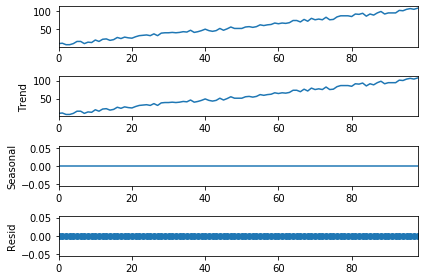

In [22]:
result.plot();

In [23]:
result.resid

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
94    0.0
95    0.0
96    0.0
97    0.0
98    0.0
Name: resid, Length: 99, dtype: float64

In [24]:
def plot_decompose(decompose_result):
    fig, axes=plt.subplots(4,1, figsize=(15,8))
    
    decompose_result.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    decompose_result.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    decompose_result.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seansonal')
    decompose_result.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

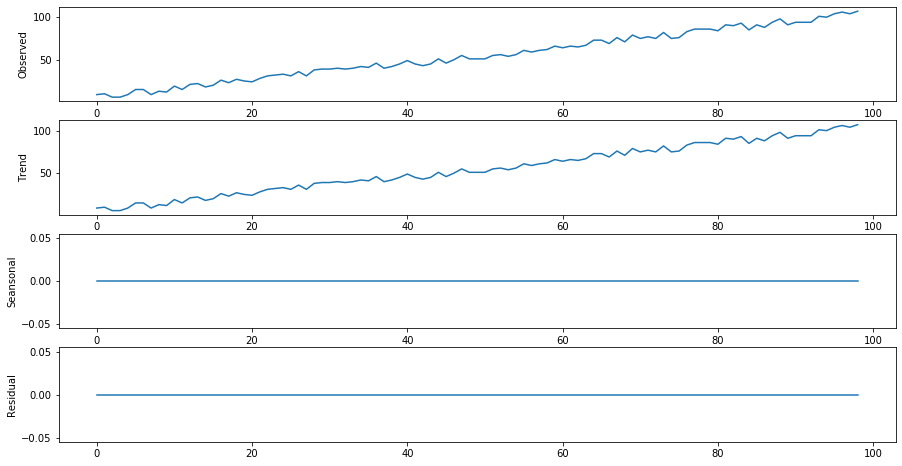

In [25]:
plot_decompose(result)

#### Multiply model

y_time = Level * Error * Trend * Seasonality

logit transformation -> additive model

In [27]:
series=pd.Series([i**2 for i in range(1,100)])

In [28]:
series

0        1
1        4
2        9
3       16
4       25
      ... 
94    9025
95    9216
96    9409
97    9604
98    9801
Length: 99, dtype: int64

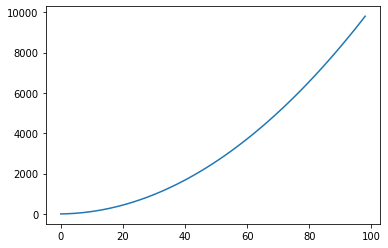

In [31]:
series.plot()

In [32]:
results=seasonal_decompose(series, model='multiplicative', freq=1)

C:\Users\river\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


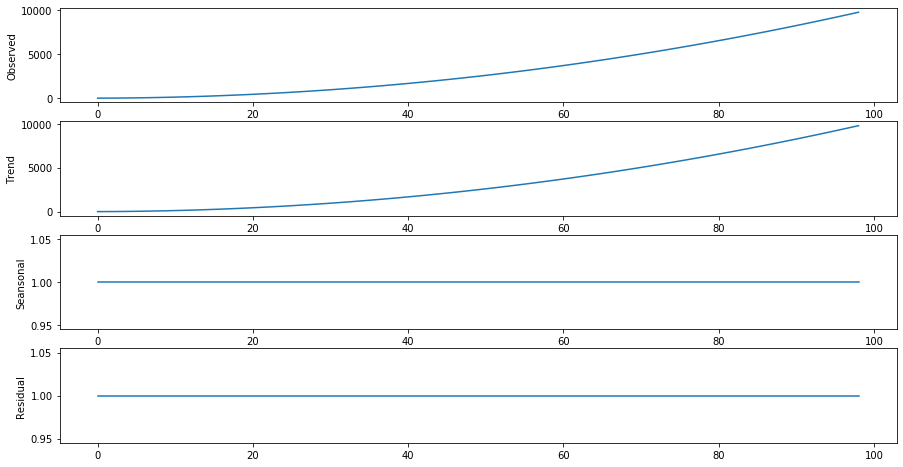

In [33]:
plot_decompose(results)

In [34]:
airline=pd.read_csv('./data/airline_passengers.csv', index_col='Month')

In [35]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


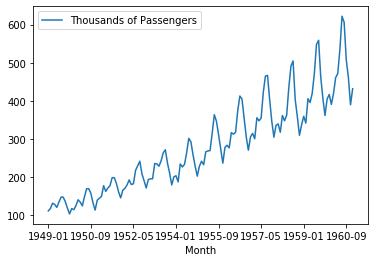

In [36]:
airline.plot()

In [37]:
airline.index=pd.to_datetime(airline.index)

In [38]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [39]:
result=seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

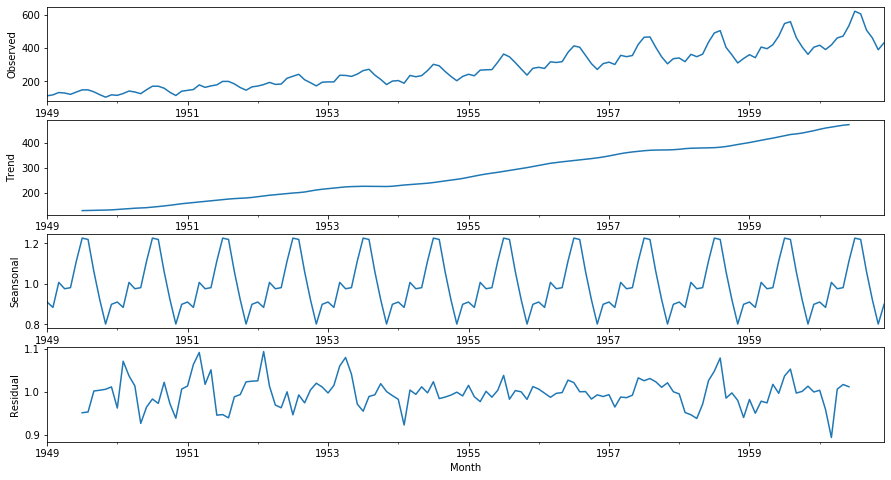

In [40]:
plot_decompose(result)